# Multi-Robot Assignment Methods

In [1]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
n_robots = 3
arena_size = (10, 10)

# Initialize random positions for robots and targets
robot_positions = np.random.rand(n_robots, 2) * arena_size
target_positions = np.random.rand(n_robots, 2) * arena_size

In [3]:
fig, ax = plt.subplots()
robots, = plt.plot(robot_positions[:, 0], robot_positions[:, 1], 'bo', label='Robots')
targets, = plt.plot(target_positions[:, 0], target_positions[:, 1], 'rs', label='Targets')
ax.set_xlim(0, arena_size[0])
ax.set_ylim(0, arena_size[1])
ax.legend()

def update(frame):
    for i in range(n_robots):
        # Move robot towards its target
        direction = target_positions[i] - robot_positions[i]
        direction_norm = np.linalg.norm(direction)
        if direction_norm > 0.1:  # If not close to the target, move
            robot_positions[i] += direction / direction_norm * 0.1  # Move a fixed step size towards the target
        
    robots.set_data(robot_positions[:, 0], robot_positions[:, 1])
    return robots,

# Create animation
ani = FuncAnimation(fig, update, frames=range(100), blit=True)
plt.show()


## Hungarian method

Initial Robot Positions:
Robot 0: [1.0934812  9.62835736]
Robot 1: [4.80794209 6.73189975]
Robot 2: [7.97995197 8.46621342]

Target Positions:
Target 0: [2.02567762 4.3043769 ]
Target 1: [9.24993279 8.79778541]
Target 2: [0.68603423 5.56062478]

Assignments:
Robot 0 is assigned to Target 2 with cost 4.09
Robot 1 is assigned to Target 0 with cost 3.69
Robot 2 is assigned to Target 1 with cost 1.31


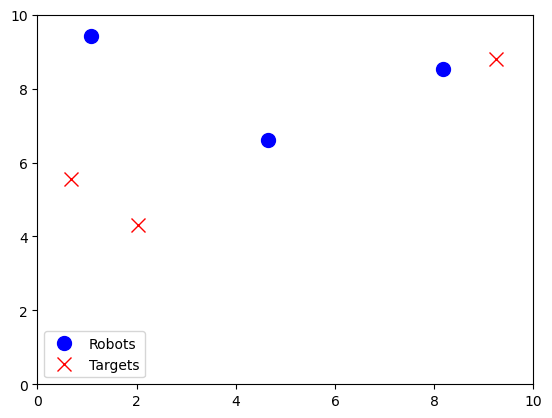

In [3]:

# Print initial positions
print("Initial Robot Positions:")
for i, pos in enumerate(robot_positions):
    print(f"Robot {i}: {pos}")

print("\nTarget Positions:")
for i, pos in enumerate(target_positions):
    print(f"Target {i}: {pos}")

# Calculate the cost matrix (Euclidean distances between robots and targets)
cost_matrix = np.linalg.norm(robot_positions[:, None, :] - target_positions[None, :, :], axis=2)

# Apply the Hungarian algorithm to find the optimal assignment
row_indices, col_indices = linear_sum_assignment(cost_matrix)

# Print the assignments
print("\nAssignments:")
for robot, target in zip(row_indices, col_indices):
    print(f"Robot {robot} is assigned to Target {target} with cost {cost_matrix[robot, target]:.2f}")

# Reorder target positions based on the assignment for visualization
assigned_target_positions = target_positions[col_indices]

# Plotting
fig, ax = plt.subplots()
robots_plot, = ax.plot(robot_positions[:, 0], robot_positions[:, 1], 'bo', markersize=10, label='Robots')
targets_plot, = ax.plot(assigned_target_positions[:, 0], assigned_target_positions[:, 1], 'rx', markersize=10, label='Targets')
ax.set_xlim(0, arena_size[0])
ax.set_ylim(0, arena_size[1])
ax.legend()

def update(frame):
    global robot_positions
    # Move each robot towards its assigned target
    for i in range(n_robots):
        direction = assigned_target_positions[i] - robot_positions[i]
        if np.linalg.norm(direction) > 0.1:
            robot_positions[i] += direction / np.linalg.norm(direction) * 0.1
    robots_plot.set_data(robot_positions[:, 0], robot_positions[:, 1])
    return robots_plot,

ani = FuncAnimation(fig, update, frames=range(100), blit=True, interval=100)
plt.show()


## Mean Field approach

### 1. Multiple Robots and Single Target

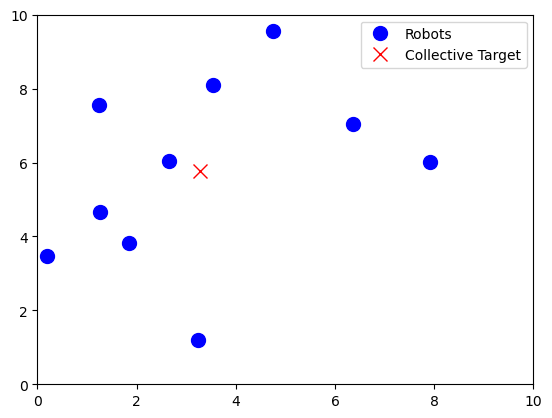

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
n_robots = 10
arena_size = (10, 10)

# Initialize random positions for robots and a single collective target
robot_positions = np.random.rand(n_robots, 2) * arena_size
collective_target_position = np.mean(robot_positions, axis=0)

fig, ax = plt.subplots()
robots_plot, = ax.plot(robot_positions[:, 0], robot_positions[:, 1], 'bo', markersize=10, label='Robots')
target_plot, = ax.plot(collective_target_position[0], collective_target_position[1], 'rx', markersize=10, label='Collective Target')
ax.set_xlim(0, arena_size[0])
ax.set_ylim(0, arena_size[1])
ax.legend()

def update(frame):
    global robot_positions
    # Move each robot a fraction towards the collective target position
    direction = collective_target_position - robot_positions
    norms = np.linalg.norm(direction, axis=1, keepdims=True)
    norms[norms == 0] = 1  # Prevent division by zero
    robot_positions += direction / norms * 0.1  # Move a fixed step size towards the target
    
    robots_plot.set_data(robot_positions[:, 0], robot_positions[:, 1])
    return robots_plot,

ani = FuncAnimation(fig, update, frames=range(100), blit=True, interval=100)
plt.show()


### 2. Multiple Robots and Multiple Targets

In [11]:
# Parameters
n_robots = 5
n_targets = 5
arena_size = (10, 10)
step_size = 0.1

# Initialize random positions for robots and targets
robot_positions = np.random.rand(n_robots, 2) * arena_size
target_positions = np.random.rand(n_targets, 2) * arena_size

distances = np.linalg.norm(target_positions - np.array([1,2]), axis=1)
robot_positions[0]
np.array([1,2])

array([1, 2])

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_robots = 5
n_targets = 5
arena_size = (10, 10)
step_size = 0.1

# Initialize random positions for robots and targets
robot_positions = np.random.rand(n_robots, 2) * arena_size
target_positions = np.random.rand(n_targets, 2) * arena_size

def move_robots(robot_positions, target_positions):
    for i, robot in enumerate(robot_positions):
        if len(target_positions) == 0:  # Check if there are no targets left
            print("All targets have been reached.")
            return robot_positions, target_positions

        # Calculate distances from current robot to all targets
        distances = np.linalg.norm(target_positions - robot, axis=1)
        nearest_target_index = np.argmin(distances)
        direction = target_positions[nearest_target_index] - robot
        distance_to_target = distances[nearest_target_index]

        # Move robot towards the nearest target
        if distance_to_target > step_size:
            robot_positions[i] += direction / np.linalg.norm(direction) * step_size
            print(f"Robot {i} moves towards Target {nearest_target_index}.")
        else:
            # Robot reaches the target
            print(f"Robot {i} reached Target {nearest_target_index}.")
            robot_positions = np.delete(robot_positions, i, axis=0)
            target_positions = np.delete(target_positions, nearest_target_index, axis=0)
            break  # Break to handle array size change
    return robot_positions, target_positions

# Simulate until all robots reach their targets or no targets are left
while len(robot_positions) > 0 and len(target_positions) > 0:
    robot_positions, target_positions = move_robots(robot_positions, target_positions)

# Final positions
print("\nSimulation completed.")
if len(robot_positions) == 0:
    print("All robots have reached their targets.")
else:
    print(f"Remaining Robots: {len(robot_positions)}, Remaining Targets: {len(target_positions)}")


Robot 0 moves towards Target 2.
Robot 1 moves towards Target 2.
Robot 2 moves towards Target 1.
Robot 3 moves towards Target 1.
Robot 4 moves towards Target 4.
Robot 0 moves towards Target 2.
Robot 1 moves towards Target 2.
Robot 2 moves towards Target 1.
Robot 3 moves towards Target 1.
Robot 4 moves towards Target 4.
Robot 0 moves towards Target 2.
Robot 1 moves towards Target 2.
Robot 2 moves towards Target 1.
Robot 3 moves towards Target 1.
Robot 4 moves towards Target 4.
Robot 0 moves towards Target 2.
Robot 1 moves towards Target 2.
Robot 2 moves towards Target 1.
Robot 3 moves towards Target 1.
Robot 4 moves towards Target 4.
Robot 0 moves towards Target 2.
Robot 1 moves towards Target 2.
Robot 2 moves towards Target 1.
Robot 3 moves towards Target 1.
Robot 4 moves towards Target 4.
Robot 0 moves towards Target 2.
Robot 1 moves towards Target 2.
Robot 2 moves towards Target 1.
Robot 3 moves towards Target 1.
Robot 4 moves towards Target 4.
Robot 0 moves towards Target 2.
Robot 1 

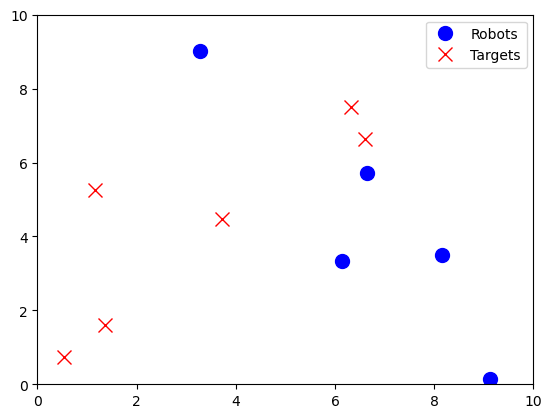

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
n_robots = 5
n_targets = 6
arena_size = (10, 10)

# Initialize random positions for robots and targets
robot_positions = np.random.rand(n_robots, 2) * arena_size
target_positions = np.random.rand(n_targets, 2) * arena_size

fig, ax = plt.subplots()
robots_plot, = ax.plot(robot_positions[:, 0], robot_positions[:, 1], 'bo', markersize=10, label='Robots')
targets_plot, = ax.plot(target_positions[:, 0], target_positions[:, 1], 'rx', markersize=10, label='Targets')
ax.set_xlim(0, arena_size[0])
ax.set_ylim(0, arena_size[1])
ax.legend()

def update(frame):
    global robot_positions, target_positions
    if len(robot_positions) == 0 or len(target_positions) == 0:
        return robots_plot, targets_plot

    # Find nearest target for each robot and move towards it
    for i, robot in enumerate(robot_positions):
        distances = np.linalg.norm(target_positions - robot, axis=1)
        nearest_target_index = np.argmin(distances)
        direction = target_positions[nearest_target_index] - robot
        robot_positions[i] += direction / np.linalg.norm(direction) * 0.1

        # Check if robot reached its target
        if np.linalg.norm(direction) < 0.1:
            robot_positions = np.delete(robot_positions, i, axis=0)
            target_positions = np.delete(target_positions, nearest_target_index, axis=0)
            break  # Break to avoid modifying list during iteration

    robots_plot.set_data(robot_positions[:, 0], robot_positions[:, 1])
    targets_plot.set_data(target_positions[:, 0], target_positions[:, 1])
    return robots_plot, targets_plot

ani = FuncAnimation(fig, update, frames=range(200), blit=True, interval=100)
plt.show()


## Market-Based Approach for Multi-Robot Task Assignment

In [8]:
import numpy as np

# Parameters
n_robots = 5
n_tasks = 5
arena_size = (10, 10)

# Generate random positions for robots and tasks in the arena
robot_positions = np.random.rand(n_robots, 2) * arena_size
task_positions = np.random.rand(n_tasks, 2) * arena_size

# Function to calculate bids based on Euclidean distance
def calculate_bids(robot_positions, task_positions):
    bids = np.linalg.norm(robot_positions[:, None, :] - task_positions[None, :, :], axis=2)
    return bids

# Function to assign tasks based on the lowest bid
def assign_tasks(bids):
    task_assignments = {}
    for task_index in range(n_tasks):
        # Find robot with the lowest bid for each task
        robot_index = np.argmin(bids[:, task_index])
        task_assignments[task_index] = robot_index
        # Increase the bid to a very high value to simulate task assignment (task cannot be assigned again)
        bids[robot_index, :] = np.inf
    return task_assignments

# Calculate bids for each robot for each task
bids = calculate_bids(robot_positions, task_positions)

# Assign tasks to robots
task_assignments = assign_tasks(bids)

# Print task assignments
print("Task Assignments:")
for task, robot in task_assignments.items():
    print(f"Task {task} assigned to Robot {robot}")


Task Assignments:
Task 0 assigned to Robot 0
Task 1 assigned to Robot 4
Task 2 assigned to Robot 3
Task 3 assigned to Robot 2
Task 4 assigned to Robot 1


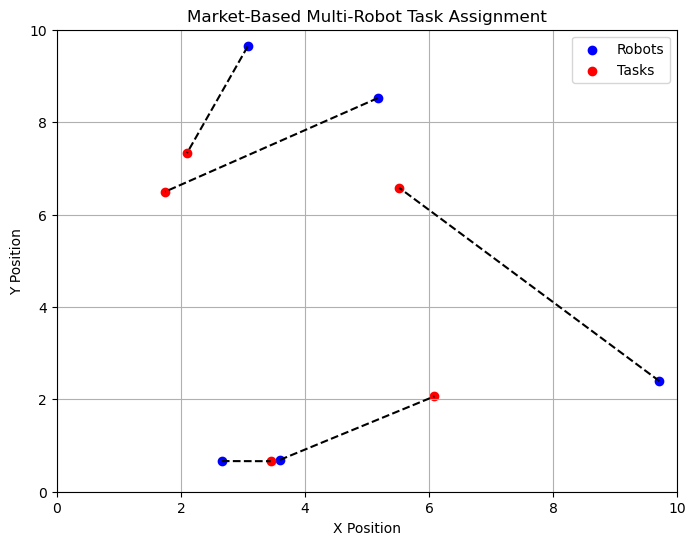

Task Assignments:
Task 0 assigned to Robot 3
Task 1 assigned to Robot 2
Task 2 assigned to Robot 0
Task 3 assigned to Robot 1
Task 4 assigned to Robot 4


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_robots = 5
n_tasks = 5
arena_size = (10, 10)

# Generate random positions for robots and tasks in the arena
robot_positions = np.random.rand(n_robots, 2) * arena_size
task_positions = np.random.rand(n_tasks, 2) * arena_size

# Function to calculate bids based on Euclidean distance
def calculate_bids(robot_positions, task_positions):
    bids = np.linalg.norm(robot_positions[:, None, :] - task_positions[None, :, :], axis=2)
    return bids

# Function to assign tasks based on the lowest bid
def assign_tasks(bids):
    task_assignments = {}
    for task_index in range(n_tasks):
        # Find robot with the lowest bid for each task
        robot_index = np.argmin(bids[:, task_index])
        task_assignments[task_index] = robot_index
        # Increase the bid to a very high value to simulate task assignment (task cannot be assigned again)
        bids[robot_index, :] = np.inf
    return task_assignments

# Calculate bids for each robot for each task
bids = calculate_bids(robot_positions, task_positions)

# Assign tasks to robots
task_assignments = assign_tasks(bids)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(robot_positions[:, 0], robot_positions[:, 1], c='blue', label='Robots')
plt.scatter(task_positions[:, 0], task_positions[:, 1], c='red', label='Tasks')
for task, robot in task_assignments.items():
    plt.plot([robot_positions[robot, 0], task_positions[task, 0]],
             [robot_positions[robot, 1], task_positions[task, 1]], 'k--')
plt.xlim(0, arena_size[0])
plt.ylim(0, arena_size[1])
plt.title('Market-Based Multi-Robot Task Assignment')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)
plt.show()

# Print task assignments
print("Task Assignments:")
for task, robot in task_assignments.items():
    print(f"Task {task} assigned to Robot {robot}")


##  Threshold-based approach for multi-robot task assignment 

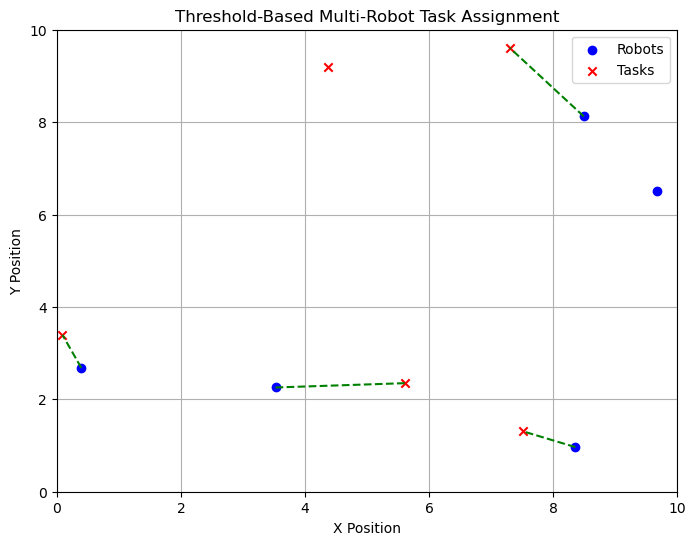

Task Assignments:
Task 0 assigned to Robot 1.
Task 1 assigned to Robot 2.
Task 2 assigned to Robot 0.
Task 3 assigned to Robot 3.


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_robots = 5
n_tasks = 5
arena_size = (10, 10)
distance_threshold = 3.0  # Maximum distance for a robot to be eligible for a task

# Generate random positions for robots and tasks
robot_positions = np.random.rand(n_robots, 2) * arena_size
task_positions = np.random.rand(n_tasks, 2) * arena_size
task_thresholds = np.full(n_tasks, distance_threshold)  # Threshold for each task

# Calculate distances from each robot to each task
distances = np.linalg.norm(robot_positions[:, None, :] - task_positions[None, :, :], axis=2)

# Determine eligibility based on distance threshold
eligible = distances < task_thresholds

# Assign tasks to robots based on eligibility and closest distance
task_assignments = {}
for task_index in range(n_tasks):
    eligible_robots = np.where(eligible[:, task_index])[0]
    if eligible_robots.size > 0:
        closest_robot = eligible_robots[np.argmin(distances[eligible_robots, task_index])]
        task_assignments[task_index] = closest_robot

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(robot_positions[:, 0], robot_positions[:, 1], c='blue', marker='o', label='Robots')
plt.scatter(task_positions[:, 0], task_positions[:, 1], c='red', marker='x', label='Tasks')
for task, robot in task_assignments.items():
    plt.plot([robot_positions[robot, 0], task_positions[task, 0]],
             [robot_positions[robot, 1], task_positions[task, 1]], 'g--')
plt.xlim(0, arena_size[0])
plt.ylim(0, arena_size[1])
plt.title('Threshold-Based Multi-Robot Task Assignment')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)
plt.show()

# Print task assignments
print("Task Assignments:")
for task, robot in task_assignments.items():
    print(f"Task {task} assigned to Robot {robot}.")


# Multi-robot path planning with collision avoidance

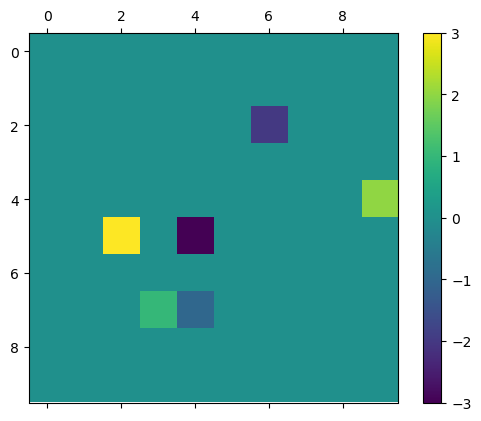

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Environment setup
grid_size = (10, 10)
n_robots = 3

# Initialize grid: 0 for empty, -1 for obstacles, positive numbers for robots, and negative numbers for targets
grid = np.zeros(grid_size, dtype=np.int8)

# Place robots and targets at random positions
np.random.seed(42)  # For reproducibility
robot_positions = []
target_positions = []

for i in range(1, n_robots + 1):
    # Robots are positive integers, targets are their negative counterparts
    rx, ry = np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1])
    tx, ty = np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1])
    while grid[rx, ry] != 0 or grid[tx, ty] != 0 or (rx == tx and ry == ty):  # Avoid collisions and overlaps
        rx, ry = np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1])
        tx, ty = np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1])
    grid[rx, ry] = i
    grid[tx, ty] = -i
    robot_positions.append((rx, ry))
    target_positions.append((tx, ty))

def animate(i):
    global robot_positions
    for i, (rx, ry) in enumerate(robot_positions):
        tx, ty = target_positions[i]
        if rx < tx and grid[rx+1, ry] == 0: rx += 1
        elif rx > tx and grid[rx-1, ry] == 0: rx -= 1
        elif ry < ty and grid[rx, ry+1] == 0: ry += 1
        elif ry > ty and grid[rx, ry-1] == 0: ry -= 1
        robot_positions[i] = (rx, ry)
        grid[:, :] = 0  # Clear grid
        for j, pos in enumerate(robot_positions):  # Update robot positions
            grid[pos] = j+1
        for j, pos in enumerate(target_positions):  # Place targets
            grid[pos] = -(j+1)
    mat.set_data(grid)
    return [mat]

# Set up the figure
fig, ax = plt.subplots()
mat = ax.matshow(grid, cmap='viridis')
plt.colorbar(mat)
ani = animation.FuncAnimation(fig, animate, frames=50, blit=True, interval=500)

plt.show()


## Step 1: Display Initial Map with Robots and Targets

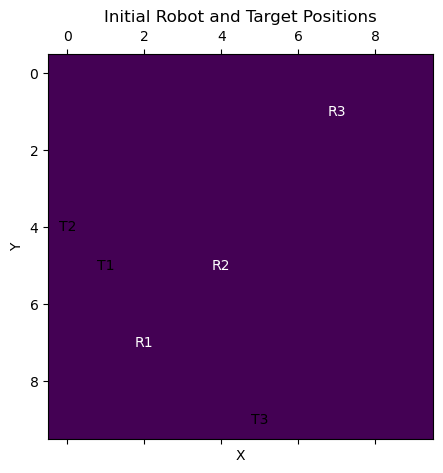

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_initial_map(grid, robot_positions, target_positions):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(grid, cmap='viridis')
    for i, (rx, ry) in enumerate(robot_positions):
        ax.text(ry, rx, f'R{i+1}', va='center', ha='center', color='white')
    for i, (tx, ty) in enumerate(target_positions):
        ax.text(ty, tx, f'T{i+1}', va='center', ha='center', color='black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Initial Robot and Target Positions')
    plt.show()

# Parameters
grid_size = (10, 10)
n_robots = 3

# Initialize grid: 0 for empty, 1 for robots, -1 for targets
grid = np.zeros(grid_size, dtype=np.int8)

# Generate positions
np.random.seed(42)
robot_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
target_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]

# Avoid overlapping positions
while len(set(robot_positions + target_positions)) < len(robot_positions + target_positions):
    robot_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
    target_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]

# Plot initial positions
plot_initial_map(grid, robot_positions, target_positions)


## Step 2: Simulate Movement with Collision Avoidance

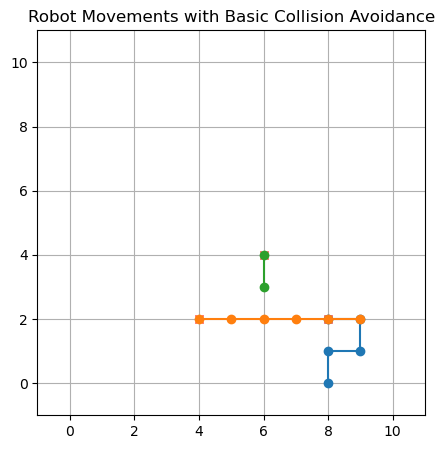

In [15]:
def move_robot(robot_pos, target_pos, other_robots):
    # Calculate potential moves
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    current_best_move = None
    current_best_distance = np.inf

    for move in moves:
        new_pos = (robot_pos[0] + move[0], robot_pos[1] + move[1])

        # Check if new position is within grid bounds
        if 0 <= new_pos[0] < grid_size[0] and 0 <= new_pos[1] < grid_size[1]:
            # Check for collision with other robots
            if new_pos not in other_robots:
                distance_to_target = np.linalg.norm(np.array(new_pos) - np.array(target_pos))
                if distance_to_target < current_best_distance:
                    current_best_distance = distance_to_target
                    current_best_move = new_pos

    return current_best_move if current_best_move else robot_pos

def simulate_movement(robot_positions, target_positions):
    paths = {i: [pos] for i, pos in enumerate(robot_positions)}  # Track paths for visualization
    for step in range(20):  # Limit steps to prevent infinite loop
        for i, robot_pos in enumerate(robot_positions):
            if robot_pos != target_positions[i]:  # Move if robot hasn't reached its target
                other_robots = robot_positions[:i] + robot_positions[i+1:]
                new_pos = move_robot(robot_pos, target_positions[i], other_robots)
                robot_positions[i] = new_pos
                paths[i].append(new_pos)  # Track path
    return paths

# Initialize the grid and positions again to reset the simulation
robot_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
target_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]

# Avoid overlapping initial positions
while len(set(robot_positions + target_positions)) < len(robot_positions + target_positions):
    robot_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
    target_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]

# Simulate movement
paths = simulate_movement(robot_positions, target_positions)

# Visualization after movement
plt.figure(figsize=(5, 5))
for target in target_positions:
    plt.plot(target[0], target[1], 'rx')  # Plot targets
for path in paths.values():
    plt.plot(*zip(*path), marker='o')  # Plot paths
plt.xlim(-1, grid_size[0]+1)
plt.ylim(-1, grid_size[1]+1)
plt.title('Robot Movements with Basic Collision Avoidance')
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters and initial setup (as previously defined)
grid_size = (10, 10)
n_robots = 3

np.random.seed(42)  # For reproducibility
robot_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
target_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]

# Ensure unique positions for robots and targets
while len(set(robot_positions + target_positions)) < len(robot_positions + target_positions):
    robot_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
    target_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]


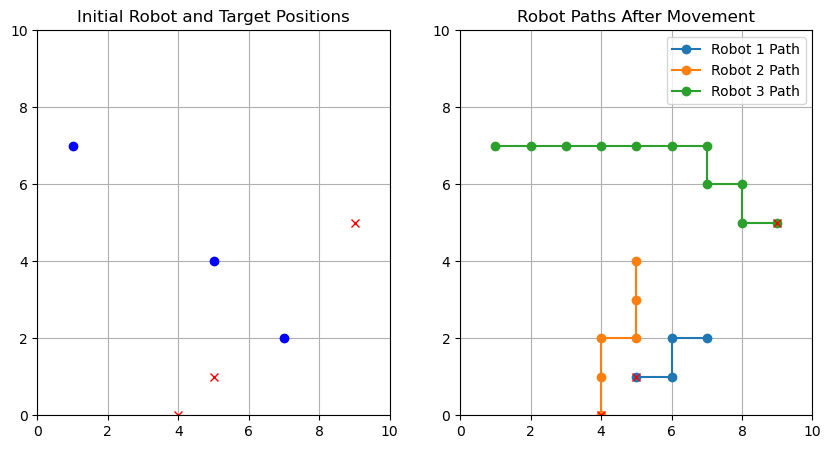

In [17]:
def plot_map_with_paths(robot_positions, target_positions, paths):
    plt.figure(figsize=(10, 5))
    
    # Plot initial setup
    plt.subplot(1, 2, 1)
    for rx, ry in robot_positions:
        plt.plot(rx, ry, 'bo')  # Initial robot positions
    for tx, ty in target_positions:
        plt.plot(tx, ty, 'rx')  # Target positions
    plt.xlim(0, grid_size[0])
    plt.ylim(0, grid_size[1])
    plt.title('Initial Robot and Target Positions')
    plt.grid(True)
    
    # Plot final paths
    plt.subplot(1, 2, 2)
    for i, path in paths.items():
        x, y = zip(*path)
        plt.plot(x, y, '-o', label=f'Robot {i+1} Path')
        plt.plot(target_positions[i][0], target_positions[i][1], 'rx')  # Re-plot targets for clarity
    plt.xlim(0, grid_size[0])
    plt.ylim(0, grid_size[1])
    plt.title('Robot Paths After Movement')
    plt.legend()
    plt.grid(True)

    plt.show()

# Simulate movement and plot results
paths = simulate_movement(robot_positions.copy(), target_positions)  # Use .copy() to keep original lists unchanged
plot_map_with_paths(robot_positions, target_positions, paths)


## With Obstacles


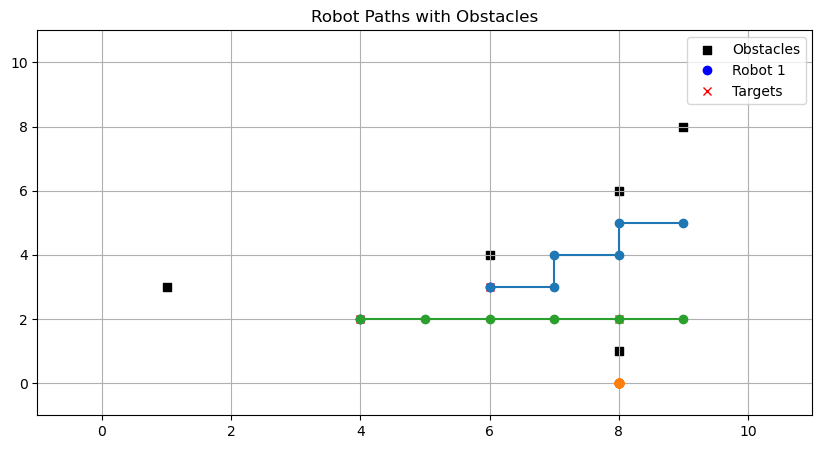

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
grid_size = (10, 10)
n_robots = 3
n_obstacles = 5  # Number of static obstacles

np.random.seed(42)  # For reproducibility

# Initialize positions
robot_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
target_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
obstacle_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_obstacles)]

# Ensure unique positions for robots, targets, and obstacles
all_positions = set(robot_positions + target_positions + obstacle_positions)
while len(all_positions) < len(robot_positions + target_positions + obstacle_positions):
    # Re-generate positions
    robot_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
    target_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_robots)]
    obstacle_positions = [(np.random.randint(grid_size[0]), np.random.randint(grid_size[1])) for _ in range(n_obstacles)]
    all_positions = set(robot_positions + target_positions + obstacle_positions)

# Adjusted move_robot function to consider obstacles
def move_robot(robot_pos, target_pos, other_robots, obstacles):
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    current_best_move = robot_pos
    current_best_distance = np.linalg.norm(np.array(robot_pos) - np.array(target_pos))

    for move in moves:
        new_pos = (robot_pos[0] + move[0], robot_pos[1] + move[1])
        if 0 <= new_pos[0] < grid_size[0] and 0 <= new_pos[1] < grid_size[1] and new_pos not in obstacles + other_robots:
            distance_to_target = np.linalg.norm(np.array(new_pos) - np.array(target_pos))
            if distance_to_target < current_best_distance:
                current_best_distance = distance_to_target
                current_best_move = new_pos

    return current_best_move

# Simulate movement considering obstacles
def simulate_movement_with_obstacles(robot_positions, target_positions, obstacle_positions):
    paths = {i: [pos] for i, pos in enumerate(robot_positions)}
    for _ in range(20):  # Limit steps
        for i, robot_pos in enumerate(robot_positions):
            if robot_pos != target_positions[i]:
                other_robots = robot_positions[:i] + robot_positions[i+1:]
                new_pos = move_robot(robot_pos, target_positions[i], other_robots, obstacle_positions)
                robot_positions[i] = new_pos
                paths[i].append(new_pos)
    return paths

# Enhanced visualization function
def plot_map_with_obstacles_and_paths(robot_positions, target_positions, obstacle_positions, paths):
    plt.figure(figsize=(10, 5))
    plt.scatter(*zip(*obstacle_positions), c='black', marker='s', label='Obstacles')  # Plot obstacles
    for i, (rx, ry) in enumerate(robot_positions):
        plt.plot(rx, ry, 'bo', label=f'Robot {i+1}' if i == 0 else "_nolegend_")
    for i, (tx, ty) in enumerate(target_positions):
        plt.plot(tx, ty, 'rx', label='Targets' if i == 0 else "_nolegend_")
    for path in paths.values():
        plt.plot(*zip(*path), '-o')  # Plot paths
    plt.xlim(-1, grid_size[0]+1)
    plt.ylim(-1, grid_size[1]+1)
    plt.title('Robot Paths with Obstacles')
    plt.legend()
    plt.grid(True)
    plt.show()

paths = simulate_movement_with_obstacles(robot_positions, target_positions, obstacle_positions)
plot_map_with_obstacles_and_paths(robot_positions, target_positions, obstacle_positions, paths)


## Simplified Obstacle Avoidance with Safety Zones

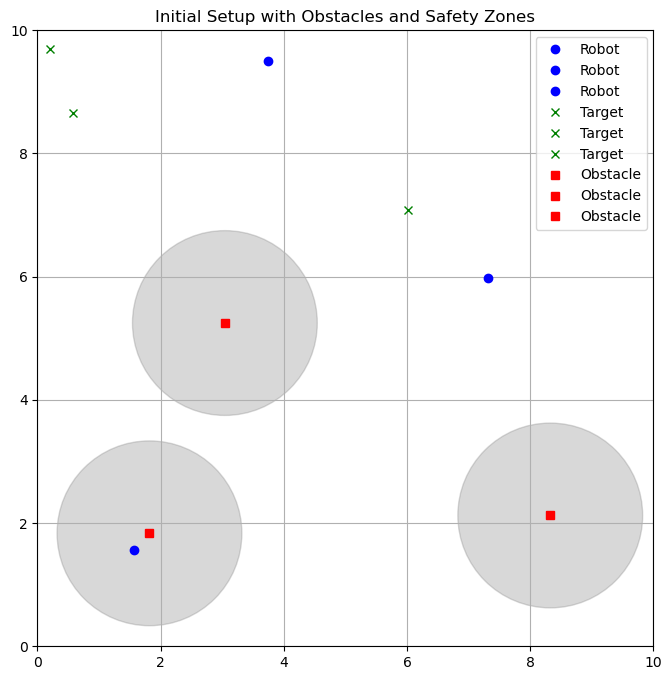

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Parameters
grid_size = (10, 10)
n_robots = 3
n_obstacles = 3
safety_radius = 1.5  # Safety radius around obstacles

np.random.seed(42)  # For reproducibility

# Generate random positions for robots, targets, and obstacles
robot_positions = np.random.rand(n_robots, 2) * grid_size
target_positions = np.random.rand(n_robots, 2) * grid_size
obstacle_positions = np.random.rand(n_obstacles, 2) * grid_size

def plot_environment_with_safety_zones(robot_positions, target_positions, obstacle_positions, safety_radius):
    fig, ax = plt.subplots(figsize=(8, 8))
    # Plot robots
    for pos in robot_positions:
        ax.plot(pos[0], pos[1], 'bo', label='Robot')
    # Plot targets
    for pos in target_positions:
        ax.plot(pos[0], pos[1], 'gx', label='Target')
    # Plot obstacles with safety zones
    for pos in obstacle_positions:
        obstacle = patches.Circle(pos, safety_radius, color='gray', alpha=0.3)
        ax.add_patch(obstacle)
        ax.plot(pos[0], pos[1], 'rs', label='Obstacle')
    ax.set_xlim(0, grid_size[0])
    ax.set_ylim(0, grid_size[1])
    ax.set_aspect('equal', adjustable='box')
    plt.title('Initial Setup with Obstacles and Safety Zones')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_environment_with_safety_zones(robot_positions, target_positions, obstacle_positions, safety_radius)


## Dynamic safety margins

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
grid_size = (10, 10)
n_robots = 3

# Each robot has a unique safety radius
safety_radii = np.array([1, 1.5, 2])  # Different safety radius for each robot

np.random.seed(42)  # For reproducibility

# Generate initial positions for robots and targets
robot_positions = np.random.rand(n_robots, 2) * grid_size
target_positions = np.random.rand(n_robots, 2) * grid_size

def check_collision(pos, other_positions, other_radii, my_radius):
    """Check for collision with other robots considering their safety radii."""
    for other_pos, radius in zip(other_positions, other_radii):
        if np.linalg.norm(np.array(pos) - np.array(other_pos)) < (my_radius + radius):
            return True  # Collision detected
    return False

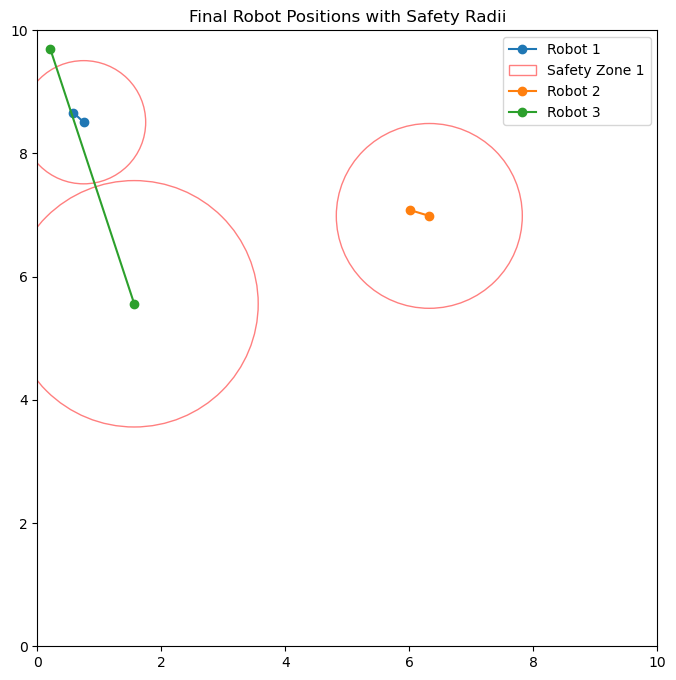

In [21]:
def move_robot(robot_pos, target_pos, other_positions, my_radius, other_radii):
    """Attempt to move robot towards target while avoiding collisions."""
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    best_move = robot_pos
    best_distance = np.linalg.norm(robot_pos - target_pos)

    for move in moves:
        new_pos = robot_pos + np.array(move)
        # Ensure new position is within bounds and not colliding
        if 0 <= new_pos[0] < grid_size[0] and 0 <= new_pos[1] < grid_size[1] and not check_collision(new_pos, other_positions, other_radii, my_radius):
            distance_to_target = np.linalg.norm(new_pos - target_pos)
            if distance_to_target < best_distance:
                best_distance = distance_to_target
                best_move = new_pos

    return best_move

# Modify the simulation loop to pass the robot's safety radius directly
n_steps = 10
for step in range(n_steps):
    for i in range(n_robots):
        other_positions = np.delete(robot_positions, i, axis=0)
        other_radii = np.delete(safety_radii, i)
        my_radius = safety_radii[i]  # Use the robot's original safety radius
        new_pos = move_robot(robot_positions[i], target_positions[i], other_positions, my_radius, other_radii)
        robot_positions[i] = new_pos

# Corrected visualization part remains unchanged
plt.figure(figsize=(8, 8))
for i, (pos, target) in enumerate(zip(robot_positions, target_positions)):
    plt.plot([pos[0], target[0]], [pos[1], target[1]], '-o', label=f'Robot {i+1}')
    circle = plt.Circle(pos, safety_radii[i], color='r', fill=False, alpha=0.5, label=f'Safety Zone {i+1}' if i == 0 else "")
    plt.gca().add_artist(circle)

plt.xlim(0, grid_size[0])
plt.ylim(0, grid_size[1])
plt.title('Final Robot Positions with Safety Radii')
plt.legend()
plt.show()


## Integrating the A* algorithm for path planning in a multi-robot system

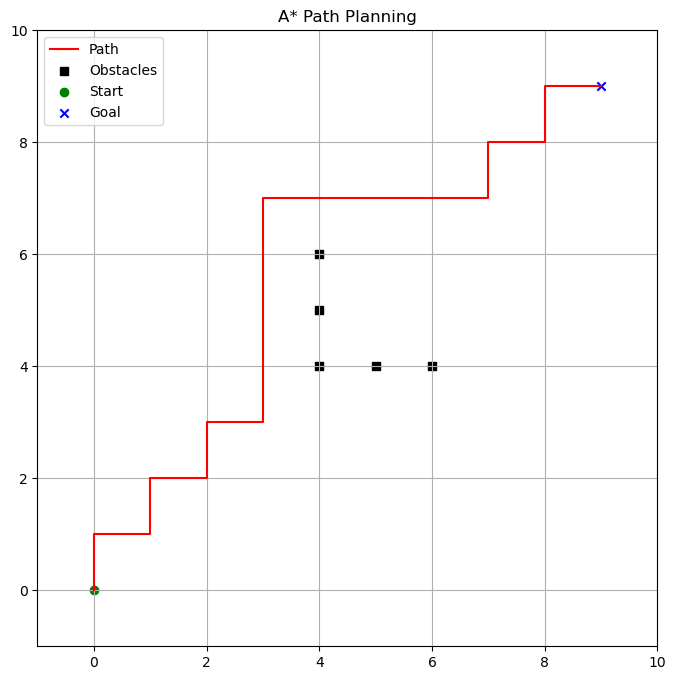

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

# Grid definition
grid_size = (10, 10)
obstacles = [(4, 4), (4, 5), (4, 6), (5, 4), (6, 4)]  # Example obstacles
start_pos = (0, 0)
goal_pos = (9, 9)

# A* Algorithm
def a_star(start, goal, obstacles, grid_size):
    # Helper functions
    def heuristic(a, b):
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    
    def get_neighbors(pos):
        neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # 4-way movement
        valid_neighbors = []
        for dx, dy in neighbors:
            newx, newy = pos[0] + dx, pos[1] + dy
            if 0 <= newx < grid_size[0] and 0 <= newy < grid_size[1] and (newx, newy) not in obstacles:
                valid_neighbors.append((newx, newy))
        return valid_neighbors

    # Initialization
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}

    # Algorithm loop
    while frontier:
        current_cost, current = heapq.heappop(frontier)

        if current == goal:
            break

        for next in get_neighbors(current):
            new_cost = cost_so_far[current] + 1  # Assuming uniform cost
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(goal, next)
                heapq.heappush(frontier, (priority, next))
                came_from[next] = current

    # Reconstruct path
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

# Find path
path = a_star(start_pos, goal_pos, obstacles, grid_size)

# Visualization
plt.figure(figsize=(8, 8))
plt.plot(*zip(*path), 'r-', label='Path')
plt.scatter(*zip(*obstacles), c='black', marker='s', label='Obstacles')
plt.scatter(*start_pos, c='green', marker='o', label='Start')
plt.scatter(*goal_pos, c='blue', marker='x', label='Goal')
plt.xlim(-1, grid_size[0])
plt.ylim(-1, grid_size[1])
plt.grid(True)
plt.legend()
plt.title('A* Path Planning')
plt.show()
